## MS Estonia Survival Predict

MS Estonia was a cruise ferry built in 1979/80 at the German shipyard Meyer Werft in Papenburg. The ship sank in 1994 in the Baltic Sea, in one of the worst maritime disasters of the 20th century. This project uses a dataset with the informations of the passengers, doing an EDA(Exploratory Data Analysis) and a prediction model(Survived or not) using Decision Trees and Random Forest Classifiers.

This Dataset contains the following data :
* **PassengerId** - Id of the Passenger
* **Country** - Origin Country of each Passenger
* **Firstname** - Firstname of each Passenger
* **Lasname** - Lastname of each Passenger
* **Sex** - Passenger Sex
* **Age** - Passenger Age
* **Category** - Passenger Category on the Cruise (P for Passenger, C for Crew)
* **Survived** - If the passenger survived or not (1 for Survived, 0 for Not Survived)

### Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('mode.chained_assignment', None)
%matplotlib inline

In [2]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
py.init_notebook_mode(connected=True)

### Importing the Dataset

In [3]:
passengers = pd.read_csv('estoniaPassengers.csv')

### Dataset Information

In [4]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB


In [5]:
passengers.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


### Null Values

There aren't null values on the dataset

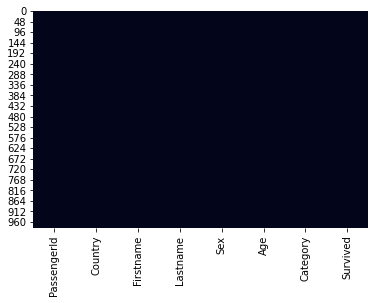

In [6]:
sns.heatmap(passengers.isnull(),cbar=False)

### Number of passengers by country

In [7]:
df2 = passengers[['Country','Survived']]
df2 = df2.rename(columns={'Survived':'People'})
df2 = df2.groupby('Country').count().reset_index()
df2.head()

,Country,People
0,Belarus,1
1,Canada,1
2,Denmark,6
3,Estonia,344
4,Finland,16


In [8]:
fig = px.bar(df2, 
             x="Country", 
             y="People", 
             title="Number of Passengers per Country")

fig.update_layout(barmode='stack', 
                  xaxis={'categoryorder':'total ascending','title':'Countries'},
                  yaxis={'title':'Passengers'})
fig.show()

We can see that there is a majority of Swedish and Estonian people in the Cruise

### Number of Passengers By Sex

In [64]:
df2 = passengers[['Sex','Category','Survived']]
df2['Survived'] = df2['Survived'].astype('str')

In [65]:
dfSex = df2.groupby('Sex').agg({'Sex' : ['count']})
dfSex.columns = ['count']
dfSex = dfSex.reset_index()

fig = px.bar(dfSex, x='Sex', y='count',
             color='Sex',
             height=400,
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(xaxis={'title':'Sex'},
                  yaxis={'title':'Number of Passengers'})

Here we can see that the number of Men and Women is  balanced

### Number of Passengers by Category

In [51]:
dfCategory = df2.groupby('Category').agg({'Category':['count']})
dfCategory.columns = ['count']
dfCategory = dfCategory.reset_index()

fig = px.bar(dfCategory, x='Category', y='count',
             color='Category',
             height=400,
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(xaxis={'title':'Category'},
                  yaxis={'title':'Number of Passengers'})

### Number of Passengers that Survived or not

In [52]:
dfSurvived = df2.groupby('Survived').agg({'Category':['count']})
dfSurvived.columns = ['count']
dfSurvived = dfSurvived.reset_index()

fig = px.bar(dfSurvived, x='Survived', y='count',
             color='Survived',
             height=400,
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(xaxis={'title':'Survived'},
                  yaxis={'title':'Number of Passengers'})

Only 13.85% of the Passengers survived

### Age Distribuition

In [13]:
fig = px.histogram(passengers, x="Age", nbins=30)
fig.show()

### Passengers Sex and Passengers Categories

Here we can see the plot of the Passengers Sex by their categories in the Cruise 

In [54]:
df2 = passengers[['Sex','Category']]
df2 = df2.groupby(['Sex', 'Category']).agg({'Category': ['count']})
df2.columns = ['count']
df2 = df2.reset_index()

fig = px.bar(df2, x='Category', y='count',
             color='Sex', barmode='group',
             height=400,
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(xaxis={'title':'Passenger Type'},
                  yaxis={'title':'Number of Passengers'})


fig.show()

### Passengers Sex and Survived or not condition

In [66]:
df2 = passengers[['Sex','Survived']]
df2['Survived'] = df2['Survived'].astype(str)
df2 = df2.groupby(['Sex', 'Survived']).agg({'Sex': ['count']})
df2.columns = ['count']
df2 = df2.reset_index()

fig = px.bar(df2, x='Sex', y='count',
             color='Survived', barmode='group',
             height=400, color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(xaxis={'title':'Sex'},
                  yaxis={'title':'Number of Passengers'})


fig.show()

In [67]:
df2 = passengers[['Category','Survived']]
df2['Survived'] = df2['Survived'].astype(str)
df2 = df2.groupby(['Category', 'Survived']).agg({'Category': ['count']})
df2.columns = ['count']
df2 = df2.reset_index()

fig = px.bar(df2, x='Category', y='count',
             color='Survived', barmode='group',
             height=400, color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(xaxis={'title':'Category'},
                  yaxis={'title':'Number of Passengers'})


fig.show()

### Survived or not Age Distribuition

In [56]:
fig = px.histogram(passengers, x="Age", color="Survived", nbins=20, color_discrete_sequence=px.colors.qualitative.Set1)
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

### Predictive Model - Data Selection

To start the model, a Dataset with the Survived, Sex, PassengerType and Age Variables is selected, encoding the labels : Sex -> Male, PassengerType -> Passenger 

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [19]:
passengers['Male'] = labelencoder.fit_transform(passengers['Sex'])
passengers['Passenger'] = labelencoder.fit_transform(passengers['Category'])

In [20]:
passengersModel = passengers.drop(columns=['Country','PassengerId','Firstname','Lastname','Sex','Category'])

In [21]:
passengersModel.head()

,Age,Survived,Male,Passenger
0,62,0,1,1
1,22,0,0,0
2,21,0,0,0
3,53,0,1,0
4,55,0,0,1


### Creating the Test and Train Datasets

In [22]:
from sklearn.model_selection import train_test_split

x = passengersModel.drop(columns=['Survived'])
y = passengersModel['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

## Machine Learning Models

Here I am going to apply 2 classification models, Decision Tree Classifier and Random Forest Classifier

### Decision Tree Classifier


In [23]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier()
Dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
pred = Dtree.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix : \n\n" , confusion_matrix(pred,y_test), "\n")
print("Classification Report : \n\n" , classification_report(pred,y_test),"\n")

Confusion Matrix : 

 [[264  47]
 [  9   7]] 

Classification Report : 

               precision    recall  f1-score   support

           0       0.97      0.85      0.90       311
           1       0.13      0.44      0.20        16

    accuracy                           0.83       327
   macro avg       0.55      0.64      0.55       327
weighted avg       0.93      0.83      0.87       327
 



## Random Forests Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
lr = RandomForestClassifier()
lr.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
pred = lr.predict(x_test)

In [28]:
print("Confusion Matrix : \n\n" , confusion_matrix(pred,y_test), "\n")
print("Classification Report : \n\n" , classification_report(pred,y_test),"\n")

Confusion Matrix : 

 [[263  45]
 [ 10   9]] 

Classification Report : 

               precision    recall  f1-score   support

           0       0.96      0.85      0.91       308
           1       0.17      0.47      0.25        19

    accuracy                           0.83       327
   macro avg       0.57      0.66      0.58       327
weighted avg       0.92      0.83      0.87       327
 

